<a href="https://colab.research.google.com/github/DINESH2006-AFK/AlfidoTechinternship1VX/blob/main/task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏠 House Price Prediction Results
Mean Squared Error (MSE): 986921767056.10
R² Score: 0.03


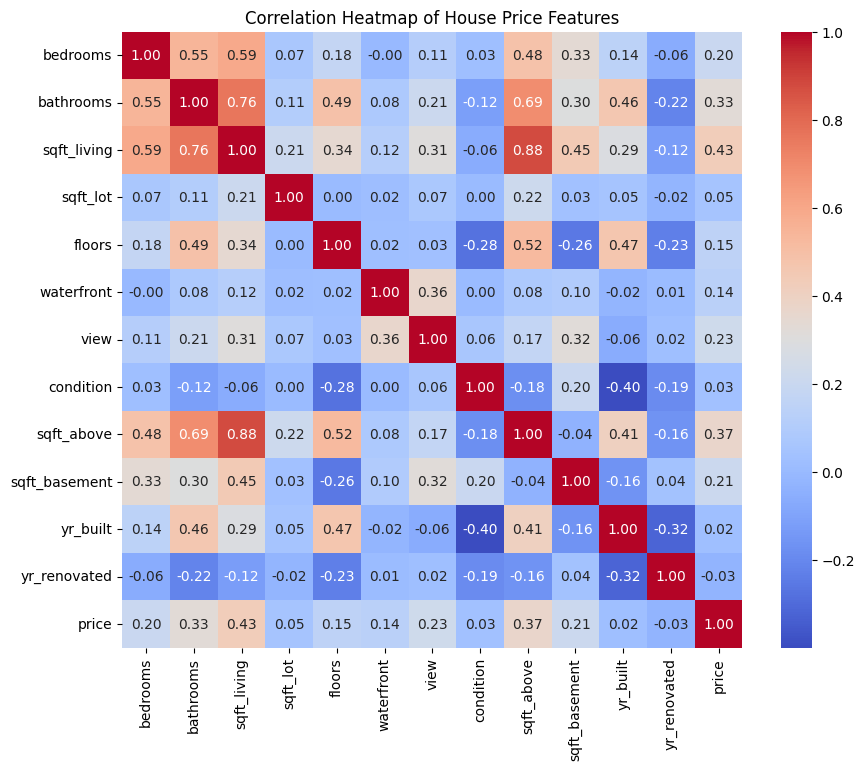

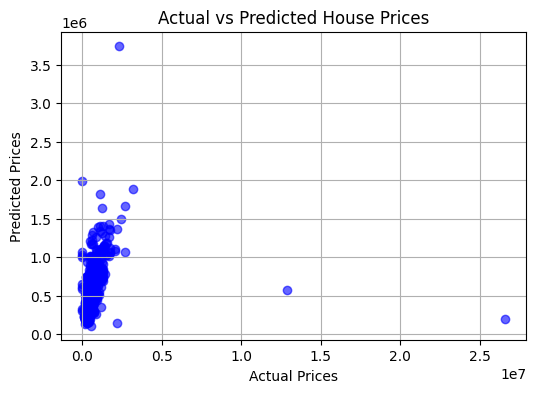

/tmp/ipython-input-1894530763.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


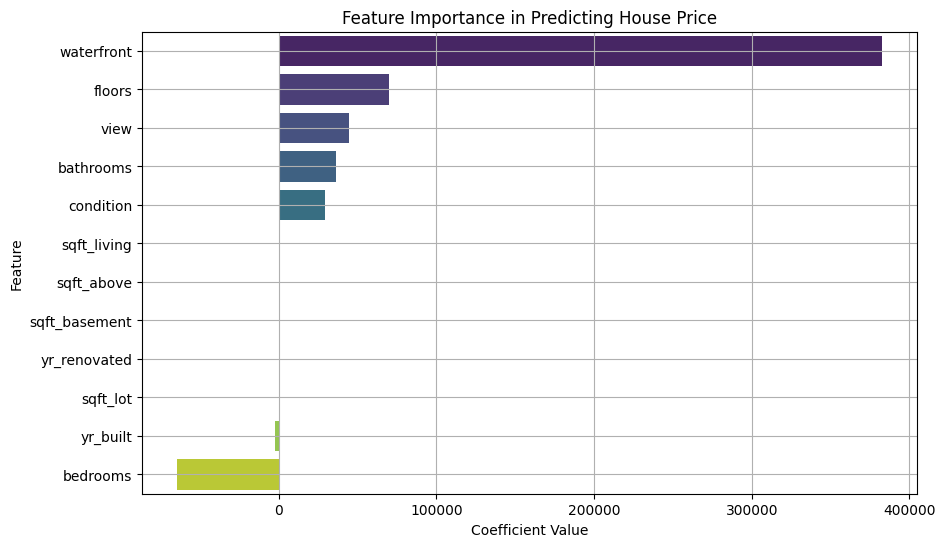


Feature Coefficients:
          Feature    Coefficient
5      waterfront  382459.666353
4          floors   69824.740108
6            view   44755.841775
1       bathrooms   36520.440676
7       condition   29335.539392
2     sqft_living     186.049845
8      sqft_above      96.860817
9   sqft_basement      89.189028
11   yr_renovated       8.259917
3        sqft_lot      -0.514414
10       yr_built   -2569.163533
0        bedrooms  -64497.461587


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/data.csv")

numeric_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated'
]

X = df[numeric_features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🏠 House Price Prediction Results")
print("=" * 40)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['price']].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of House Price Features")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title("Feature Importance in Predicting House Price")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
print("\nFeature Coefficients:")
print(coeff_df)
